In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [2]:
Water_Spring_Amiata = pd.read_csv('./datasets/Water_Spring_Amiata.csv')


In [3]:
Water_Spring_Amiata

,Date,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.15,NaN,NaN,NaN,NaN,NaN
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55,NaN,NaN,NaN,NaN,NaN
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.70,NaN,NaN,NaN,NaN,NaN
3,04/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN
4,05/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.60,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,26/06/2020,0.0,0.0,0.0,0.0,0.0,-38.38,-51.89,-303.27,20.70,18.30,19.20,-0.359942,-2.925253,-5.75661,-21.358856
7483,27/06/2020,0.0,0.0,0.0,0.0,0.0,-38.38,-51.89,-303.27,20.50,17.95,18.85,-0.359942,-2.925253,-5.75661,-21.358856
7484,28/06/2020,0.0,0.0,0.0,0.0,0.0,-38.38,-51.89,-303.27,22.10,19.90,20.45,-0.341945,-2.778991,-5.46878,-20.290913
7485,29/06/2020,0.0,0.0,0.0,0.0,0.0,-38.37,-51.89,-303.28,22.45,20.15,20.20,-0.359942,-2.925253,-5.75661,-21.358856


In [4]:
Water_Spring_Amiata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   7487 non-null   object 
 1   Rainfall_Castel_del_Piano              6291 non-null   float64
 2   Rainfall_Abbadia_S_Salvatore           3586 non-null   float64
 3   Rainfall_S_Fiora                       2633 non-null   float64
 4   Rainfall_Laghetto_Verde                2865 non-null   float64
 5   Rainfall_Vetta_Amiata                  2212 non-null   float64
 6   Depth_to_Groundwater_S_Fiora_8         3569 non-null   float64
 7   Depth_to_Groundwater_S_Fiora_11bis     3594 non-null   float64
 8   Depth_to_Groundwater_David_Lazzaretti  3242 non-null   float64
 9   Temperature_Abbadia_S_Salvatore        3583 non-null   float64
 10  Temperature_S_Fiora                    7487 non-null   float64
 11  Temp

In [5]:
Water_Spring_Amiata.shape

(7487, 16)

### Filled Entries

<AxesSubplot:>

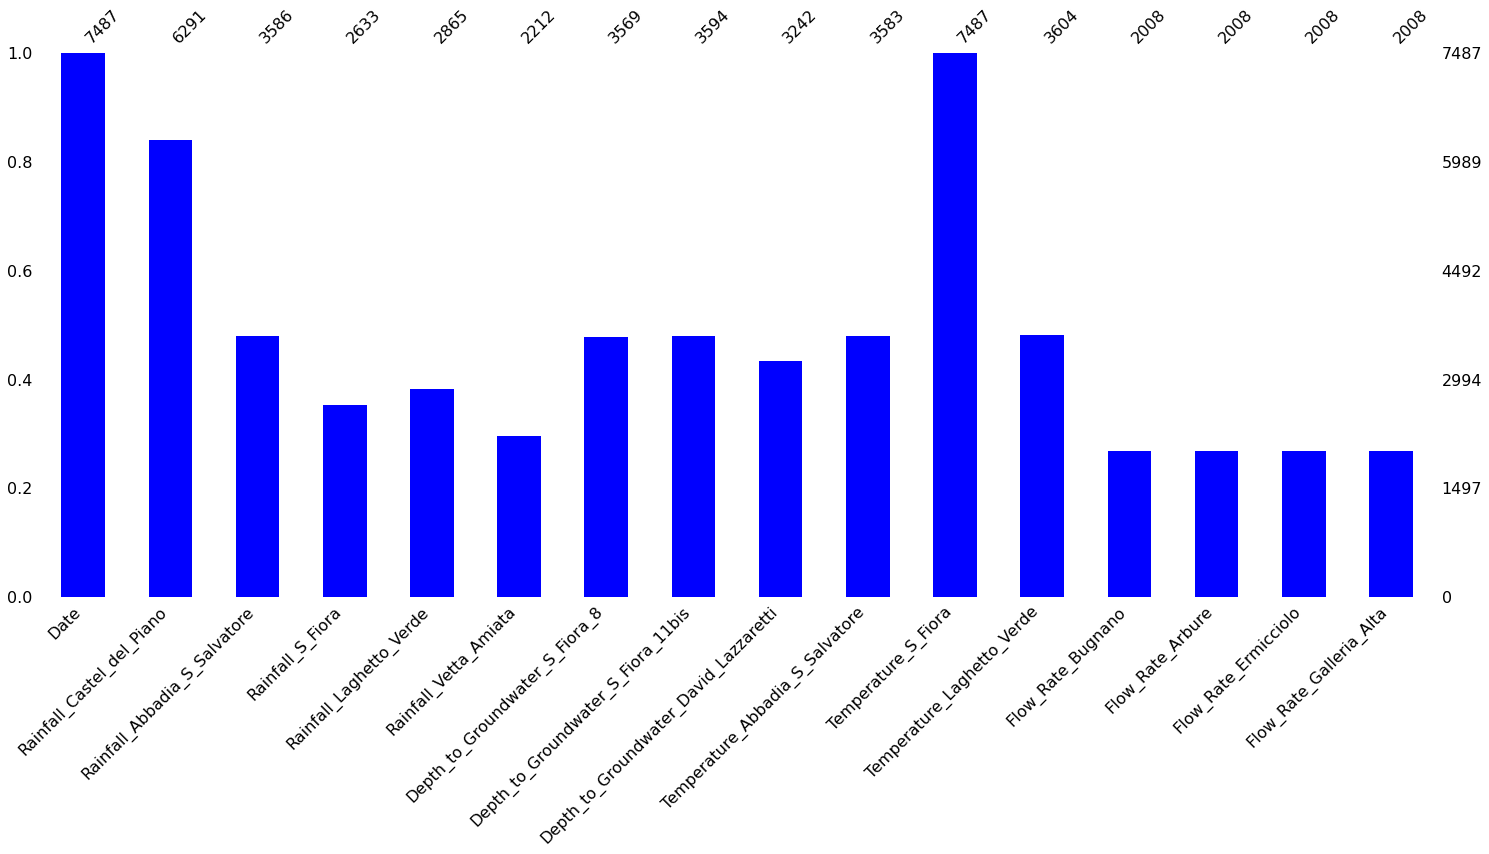

In [6]:
msno.bar(Water_Spring_Amiata,color='b')

### Dates starting and ending values

In [7]:
print('starting date:', Water_Spring_Amiata.Date.values[[0,-1]][0])
print('ending date:', Water_Spring_Amiata.Date.values[[0,-1]][1])


starting date: 01/01/2000
ending date: 30/06/2020


### Position of Null values

<AxesSubplot:>

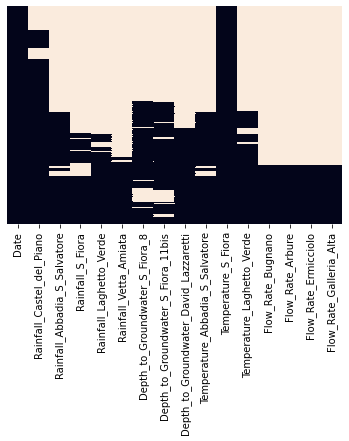

In [8]:
sns.heatmap(Water_Spring_Amiata.isnull(),yticklabels=False,cbar=False)

In [9]:
data=Water_Spring_Amiata.copy()
data.drop('Date',axis=1,inplace=True)

### Feature Selection

<AxesSubplot:>

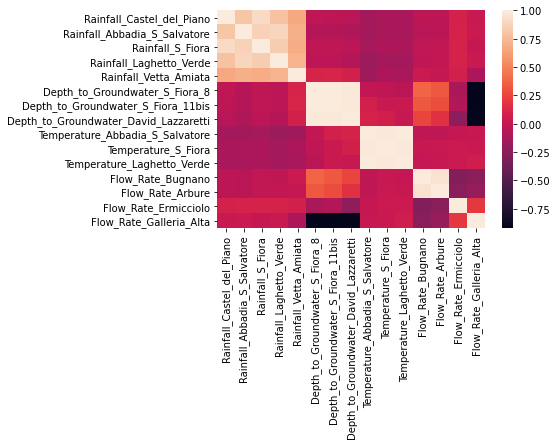

In [10]:
sns.heatmap(data.corr())

In [11]:
file = Water_Spring_Amiata
features_nan=[features for features in file.columns if file[features].isnull().sum()>1 and file[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(file[feature].isnull().mean()*100,4),'% missing ')

Rainfall_Castel_del_Piano 15.9744 % missing 
Rainfall_Abbadia_S_Salvatore 52.1036 % missing 
Rainfall_S_Fiora 64.8324 % missing 
Rainfall_Laghetto_Verde 61.7337 % missing 
Rainfall_Vetta_Amiata 70.4555 % missing 
Depth_to_Groundwater_S_Fiora_8 52.3307 % missing 
Depth_to_Groundwater_S_Fiora_11bis 51.9968 % missing 
Depth_to_Groundwater_David_Lazzaretti 56.6983 % missing 
Temperature_Abbadia_S_Salvatore 52.1437 % missing 
Temperature_Laghetto_Verde 51.8632 % missing 
Flow_Rate_Bugnano 73.1802 % missing 
Flow_Rate_Arbure 73.1802 % missing 
Flow_Rate_Ermicciolo 73.1802 % missing 
Flow_Rate_Galleria_Alta 73.1802 % missing 


In [12]:
'''
Columns that are going to be dropped

'Temperature_Le_Croci'

'''

"\nColumns that are going to be dropped\n\n'Temperature_Le_Croci'\n\n"

In [13]:
Lake_Bilancino_corr = Water_Spring_Amiata.drop(['Temperature_Le_Croci'],axis=1)

KeyError: "['Temperature_Le_Croci'] not found in axis"

<AxesSubplot:>

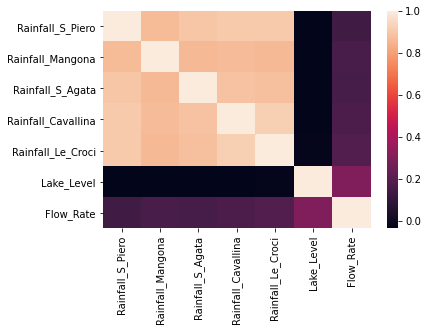

In [ ]:
sns.heatmap(Lake_Bilancino_corr.corr())

In [ ]:
a = Water_Spring_Amiata.drop(['Temperature_Le_Croci'],axis=1)

features_nan=[features for features in a.columns if a[features].isnull().sum()>1 and a[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(a[feature].isnull().mean()*100,4),'% missing ')

Rainfall_S_Piero 8.7385 % missing 
Rainfall_Mangona 8.7385 % missing 
Rainfall_S_Agata 8.7385 % missing 
Rainfall_Cavallina 8.7385 % missing 
Rainfall_Le_Croci 8.7385 % missing 
Flow_Rate 0.318 % missing 


In [ ]:
Water_Spring_Amiata.drop(['Date','Temperature_Le_Croci'],axis=1)

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Lake_Level,Flow_Rate
0,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,NaN,NaN,NaN,NaN,NaN,249.44,0.31
...,...,...,...,...,...,...,...
6598,0.0,0.0,0.0,0.0,0.0,250.85,0.60
6599,0.0,0.0,0.0,0.0,0.0,250.84,0.60
6600,0.0,0.0,0.0,0.0,0.0,250.83,0.60
6601,0.0,0.0,0.0,0.0,0.0,250.82,0.60


### Imputation